In [35]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [36]:
# I'll be using this file to classify color from image.

color_names = pd.read_excel(r"C:\Users\aakas\Documents\rgb colors.xlsx",
                           names=['color','color_name','hex','R','G','B'])
color_names.dropna(inplace=True)
color_names.reset_index(drop=True, inplace=True)
color_names.head()

,color,color_name,hex,R,G,B
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0.0,48.0,143.0
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114.0,160.0,193.0
2,alabama_crimson,Alabama Crimson,#a32638,163.0,38.0,56.0
3,alice_blue,Alice Blue,#f0f8ff,240.0,248.0,255.0
4,alizarin_crimson,Alizarin Crimson,#e32636,227.0,38.0,54.0


(([], []), ([], []))

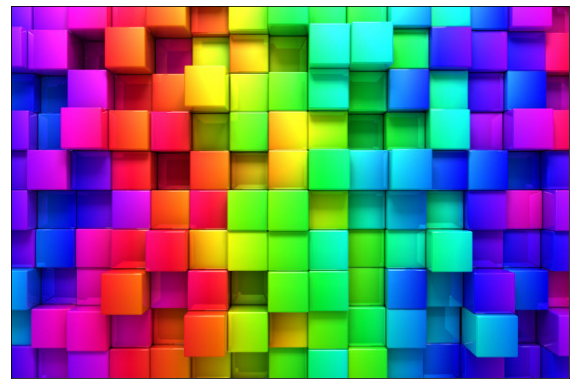

In [43]:
path = "C:\\Users\\aakas\\Downloads\\color_image.jpg"

plt.figure(figsize=(10,10))
img = cv2.imread(path)
plt.imshow(img)
plt.xticks([]), plt.yticks([])

### call back function

In [44]:
clicked=False

def draw_function(event, x,y, flags, param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        global clicked,x_,y_,b,g,r
        clicked=True
        x_,y_ = x,y
        b,g,r= img[y,x]
        b,g,r = int(b),int(g),int(r)

In [45]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)

In [46]:
# function to classiy color using the file imported.

def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(color_names)):
        d = abs(R- int(color_names.loc[i,"R"])) + abs(G- int(color_names.loc[i,"G"]))+ abs(B- int(color_names.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = color_names.loc[i,"color_name"]
    return cname

In [47]:
while(1):
    cv2.imshow('image',img)
    if clicked == True:
        cv2.rectangle(img, (20,20),(600,60),(b,g,r), -1)
    
        text = getColorName(r,g,b)# + 'R='+str(r) + 'B='+str(g) + 'G='+str(b)
    
        cv2.putText(img, text, (50,50), 2, 0.5, (255,255,255), 2, cv2.LINE_AA)

        clicked=False
        
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()